In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as plticker
from matplotlib.colors import LinearSegmentedColormap
%matplotlib widget
from ipywidgets import interact, widgets

font = {
        'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 10,
        }

matplotlib.rc('font', **font)
matplotlib.rcParams["figure.figsize"] = (9,4)
matplotlib.rcParams["figure.autolayout"] = True

### Definición de funciones

In [2]:
EPS = 1e-12

def wavelength_to_rgb(wavelength, gamma=0.8):

    '''This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    '''

    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    # R *= 255
    # G *= 255
    # B *= 255
    # return (int(R), int(G), int(B))
    return (R,G,B)


def difraccion(x, lam, L, a):
    beta = 2*np.pi/lam *a*x/L
    I = (np.sin(beta/2)/(beta/2+EPS))**2
    return I/max(I)


def interferencia(x, lam, L, d, N):
    beta = 2*np.pi/lam *d*x/L
    I = (np.sin(N*beta/2)/(np.sin(beta/2)+EPS))**2
    return I/max(I)

def int_dif(x, lam, L, a, d, N):
    return difraccion(x, lam, L, a)*interferencia(x, lam, L, d, N)



---

# Difracción por una sola rendija, con dos longitudes de onda distintas

In [9]:
L = 1
a = 4.0e-6
lam0 = 400e-9
x_lim = 3.1*lam0*L/a
x = np.linspace(-x_lim, x_lim, 100000)

interactive(children=(IntSlider(value=500, continuous_update=False, description='$\\lambda$_1', max=600, min=4…

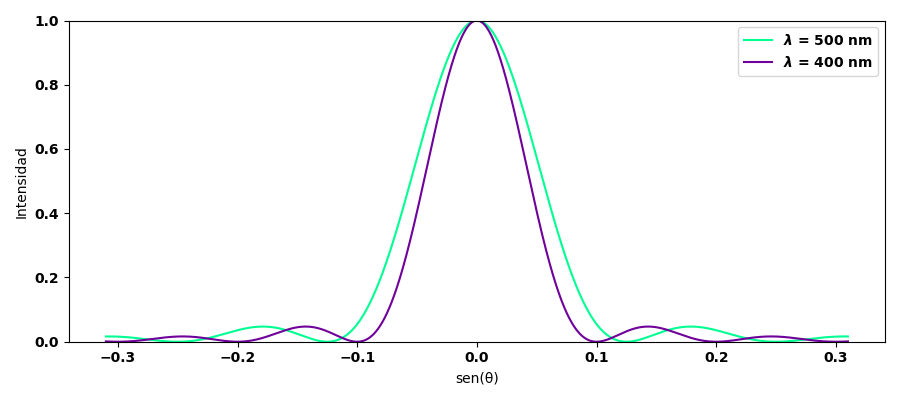

In [11]:
fig1, ax1 = plt.subplots()
fig1.canvas.header_visible = False

sl_lam1 = widgets.IntSlider(
    value=500,
    min=400,
    max=600,
    step=20,
    description='$\lambda$_1',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

sl_lam2 = widgets.IntSlider(
    value=400,
    min=400,
    max=600,
    step=20,
    description='$\lambda$_2',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)


sl_L = widgets.FloatSlider(
    value=1.0,
    min=1.0,
    max=2.0,
    step=0.1,
    description='L:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)


sl_a = widgets.FloatSlider(
    value=4.0e-6,
    min=1e-6,
    max=1e-5,
    step=1e-6,
    description='a:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1e',
)




@interact(lam=sl_lam1, lam2=sl_lam2, L=sl_L, a=sl_a)
def update(lam,lam2, L, a):
    ax1.clear()
    y = difraccion(x, lam*1e-9, L, a)
    y2 = difraccion(x, lam2*1e-9, L, a)
    color1 = wavelength_to_rgb(lam)
    color2 = wavelength_to_rgb(lam2)
    ax1.plot(x,y, color=color1, label=f"$\lambda$ = {lam} nm")
    ax1.plot(x,y2, color=color2, label=f"$\lambda$ = {lam2} nm")

    #loc = plticker.MultipleLocator(base=0.05) # this locator puts ticks at regular intervals
    #ax1.xaxis.set_major_locator(loc)
    ax1.set_ylim(0,1)
    ax1.set_xlabel('sen(θ)')
    ax1.set_ylabel('Intensidad')
    ax1.legend();

---


# Interferencia + difracción a través de N rendijas

In [5]:
L = 1
d = 30 *1e-6
a = 6 *1e-6
N = 5
lam = 600 *1e-9

x_lim = 2.2*lam*L/a
x = np.linspace(-x_lim, x_lim, 100_000)
y = int_dif(x, lam, L, a, d, N)

color = wavelength_to_rgb(lam*1e9)

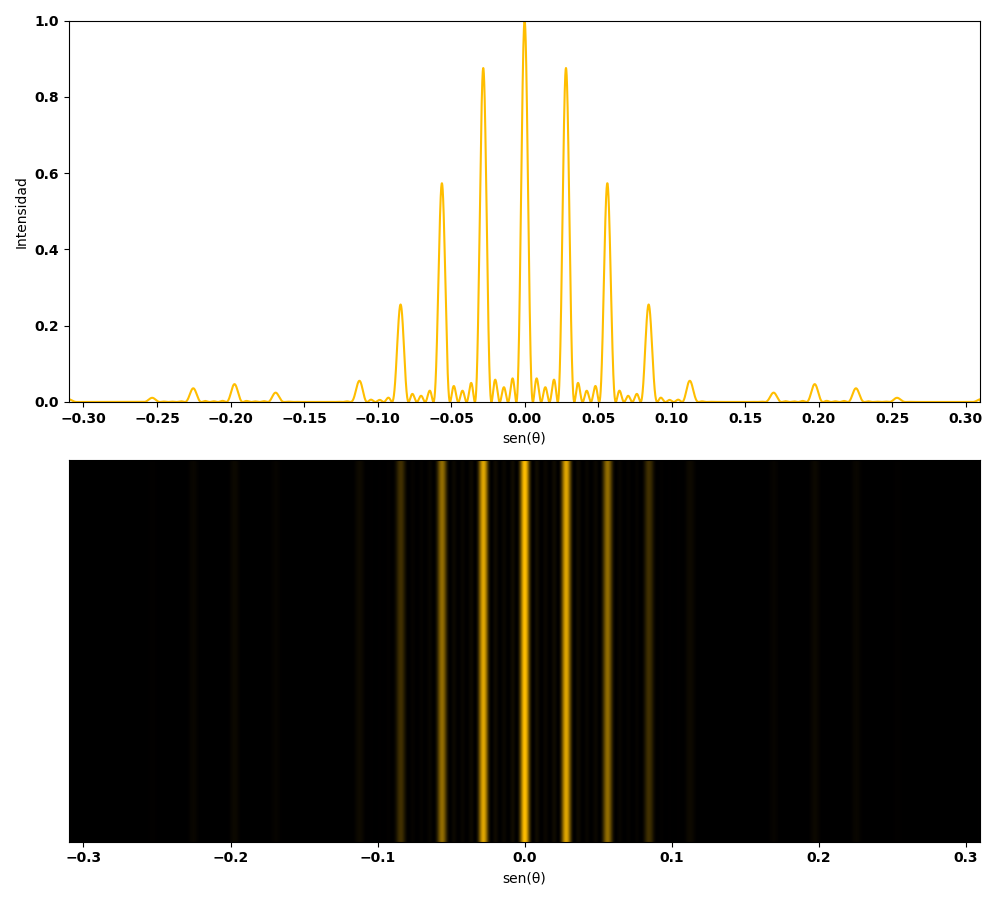

In [12]:
fig2, (ax3, ax4) = plt.subplots(2, 1)
fig2.set_size_inches(10, 9)
fig2.canvas.header_visible = False
ax3.plot(x,y, color=color)
ax3.margins(x=0)
loc = plticker.MultipleLocator(base=0.05) # this locator puts ticks at regular intervals
ax3.xaxis.set_major_locator(loc)
ax3.set_ylim(0,1)
ax3.set_xlabel('sen(θ)')
ax3.set_ylabel('Intensidad')
height = 1
image = np.tile(y, (height,1))

colors = [
    (0,0,0),
    color,
]
cmap = LinearSegmentedColormap.from_list("simple", colors)

# fig, ax = plt.subplots()
ax4.imshow(image, cmap=cmap, aspect="auto", extent=[-x_lim, x_lim, -1,1] )
ax4.set_xlabel('sen(θ)')
ax4.yaxis.set_visible(False)

---


# Red de difracción iluminada con un espectro NO monocromático

In [7]:
L = 1
N = 6000        # lineas/cm
d = 1/N *1e-2   # metros
# a = d/10
l_inf = 480 *1e-9
l_sup = 650 *1e-9

x_lim = 3.2*l_sup*L/d
x = np.linspace(-x_lim, x_lim, 100_000)

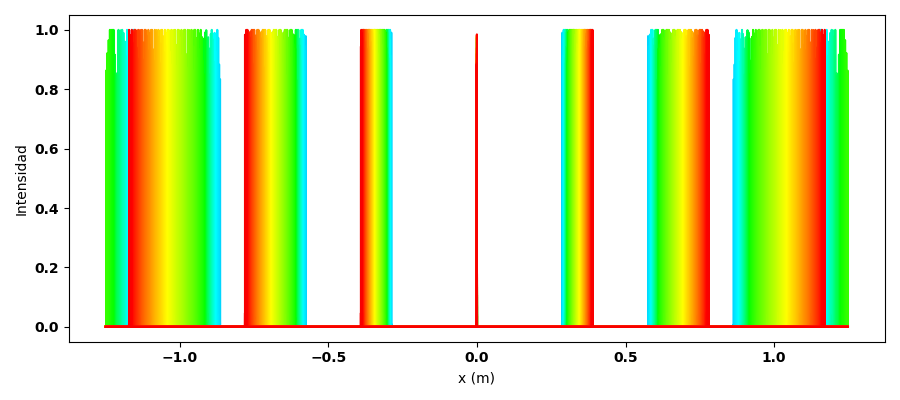

In [8]:

fig3, ax4 = plt.subplots()

# wv = 440 *1e-9
# waves = np.linspace(wv, wv*1.01, 40)

waves = np.linspace(l_inf, l_sup, 100)
for wave in waves:
    i = interferencia(x, wave, L, d, N)
    ax4.plot(x, i, label=f'{wave*1e9:.0f} nm', color=wavelength_to_rgb(wave*1e9))

# ax.legend()
# loc = plticker.MultipleLocator(base=0.05) # this locator puts ticks at regular intervals
# ax.xaxis.set_major_locator(loc)
ax4.set_xlabel('x (m)')
ax4.set_ylabel('Intensidad')
plt.show()